Code repurposed from Kaggle [https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-cryptocurrencies]

## import dependencies

In [1]:
import pandas as pd
import pandas_datareader as web
import numpy as np
from pathlib import Path
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

## load and inspect data

In [2]:
crypto_currency = 'MIOTA'
against_currency = 'USD'

start = dt.datetime(2014,1,1)
end = dt.datetime.now()

base_df = web.DataReader(f'{crypto_currency}-{against_currency}', 'yahoo', start, end)
base_df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-06-12,0.652862,0.533910,0.638503,0.590255,25425600.0,0.590255
2017-06-13,0.606196,0.495745,0.592347,0.528916,14194900.0,0.528916
2017-06-14,0.543165,0.300365,0.528284,0.363661,10300400.0,0.363661
2017-06-15,0.448249,0.309852,0.353285,0.410757,6920690.0,0.410757
2017-06-16,0.444205,0.414139,0.426762,0.419906,3100660.0,0.419906
...,...,...,...,...,...,...
2021-06-16,1.119495,1.059894,1.064831,1.098097,33815655.0,1.098097
2021-06-17,1.099985,0.990247,1.099985,1.008697,39885516.0,1.008697
2021-06-18,1.027678,0.964381,1.010415,0.966526,42059039.0,0.966526


In [3]:
base_df['Spread'] = base_df.High - base_df.Low
base_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1466 entries, 2017-06-12 to 2021-06-22
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1466 non-null   float64
 1   Low        1466 non-null   float64
 2   Open       1466 non-null   float64
 3   Close      1466 non-null   float64
 4   Volume     1466 non-null   float64
 5   Adj Close  1466 non-null   float64
 6   Spread     1466 non-null   float64
dtypes: float64(7)
memory usage: 91.6 KB


## Plot the closing value of Iota over time

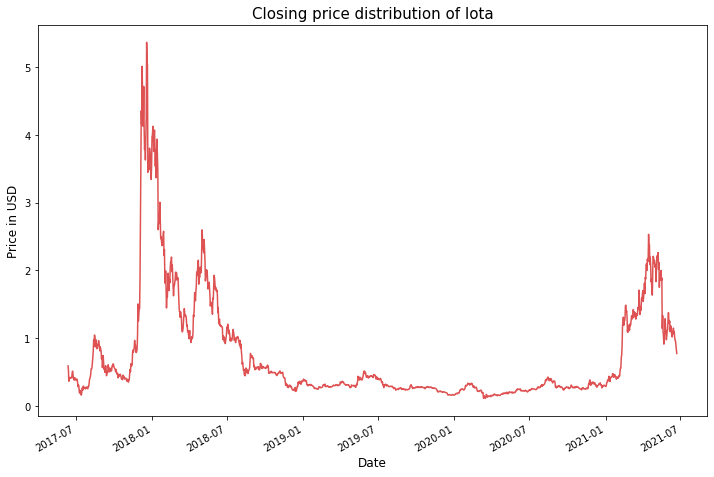

In [4]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(12,8))

sns.lineplot(y = base_df.Close.values, x=base_df.index.values, alpha=0.8, color=color[3])
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m.%d'))
fig.autofmt_xdate()
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.title("Closing price distribution of Iota", fontsize=15)
plt.show()

## Candlestick chart

In [5]:
import matplotlib.ticker as mticker
import mplfinance as mpf

#base_df['Date_mpl'] = base_df['Date'].apply(lambda x: mdates.date2num(x))

temp_base_df = base_df.copy(deep=False)
#temp_base_df = temp_base_df.set_index(['Date'])
temp_base_df = temp_base_df.drop(['Spread'], axis=1)
temp_base_df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-06-12,0.652862,0.533910,0.638503,0.590255,25425600.0,0.590255
2017-06-13,0.606196,0.495745,0.592347,0.528916,14194900.0,0.528916
2017-06-14,0.543165,0.300365,0.528284,0.363661,10300400.0,0.363661
2017-06-15,0.448249,0.309852,0.353285,0.410757,6920690.0,0.410757
2017-06-16,0.444205,0.414139,0.426762,0.419906,3100660.0,0.419906
...,...,...,...,...,...,...
2021-06-16,1.119495,1.059894,1.064831,1.098097,33815655.0,1.098097
2021-06-17,1.099985,0.990247,1.099985,1.008697,39885516.0,1.008697
2021-06-18,1.027678,0.964381,1.010415,0.966526,42059039.0,0.966526


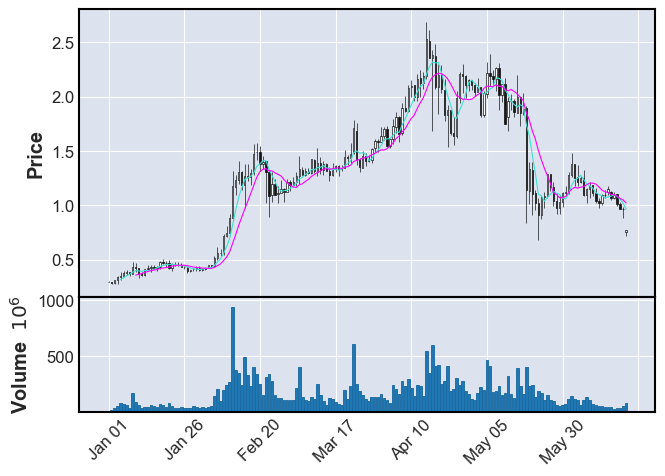

In [6]:
mpf.plot(temp_base_df.loc['2021-1-1':], type='candle', mav=(5,10), volume=True)

## Future Price Prediction

In [7]:
from fbprophet import Prophet

In [8]:
base_df

,High,Low,Open,Close,Volume,Adj Close,Spread
Date,,,,,,,
2017-06-12,0.652862,0.533910,0.638503,0.590255,25425600.0,0.590255,0.118952
2017-06-13,0.606196,0.495745,0.592347,0.528916,14194900.0,0.528916,0.110451
2017-06-14,0.543165,0.300365,0.528284,0.363661,10300400.0,0.363661,0.242800
2017-06-15,0.448249,0.309852,0.353285,0.410757,6920690.0,0.410757,0.138397
2017-06-16,0.444205,0.414139,0.426762,0.419906,3100660.0,0.419906,0.030066
...,...,...,...,...,...,...,...
2021-06-16,1.119495,1.059894,1.064831,1.098097,33815655.0,1.098097,0.059601
2021-06-17,1.099985,0.990247,1.099985,1.008697,39885516.0,1.008697,0.109738
2021-06-18,1.027678,0.964381,1.010415,0.966526,42059039.0,0.966526,0.063297


In [9]:
price_predict_df = base_df['Close'].copy(deep=False).reset_index()
price_predict_df.columns = ["ds", "y"]
price_predict_df = price_predict_df[price_predict_df['ds']>'2020-6-1']
price_predict_df

,ds,y
1085,2020-06-02,0.250195
1086,2020-06-03,0.249497
1087,2020-06-04,0.242030
1088,2020-06-05,0.242918
1089,2020-06-06,0.240929
...,...,...
1461,2021-06-16,1.098097
1462,2021-06-17,1.008697
1463,2021-06-18,0.966526
1464,2021-06-19,0.962931


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
382,2021-06-25,0.942247,0.751656,1.134670
383,2021-06-26,0.934506,0.743562,1.126262
384,2021-06-27,0.907845,0.706680,1.090455
385,2021-06-28,0.913540,0.719922,1.114637
386,2021-06-29,0.879402,0.686395,1.064670


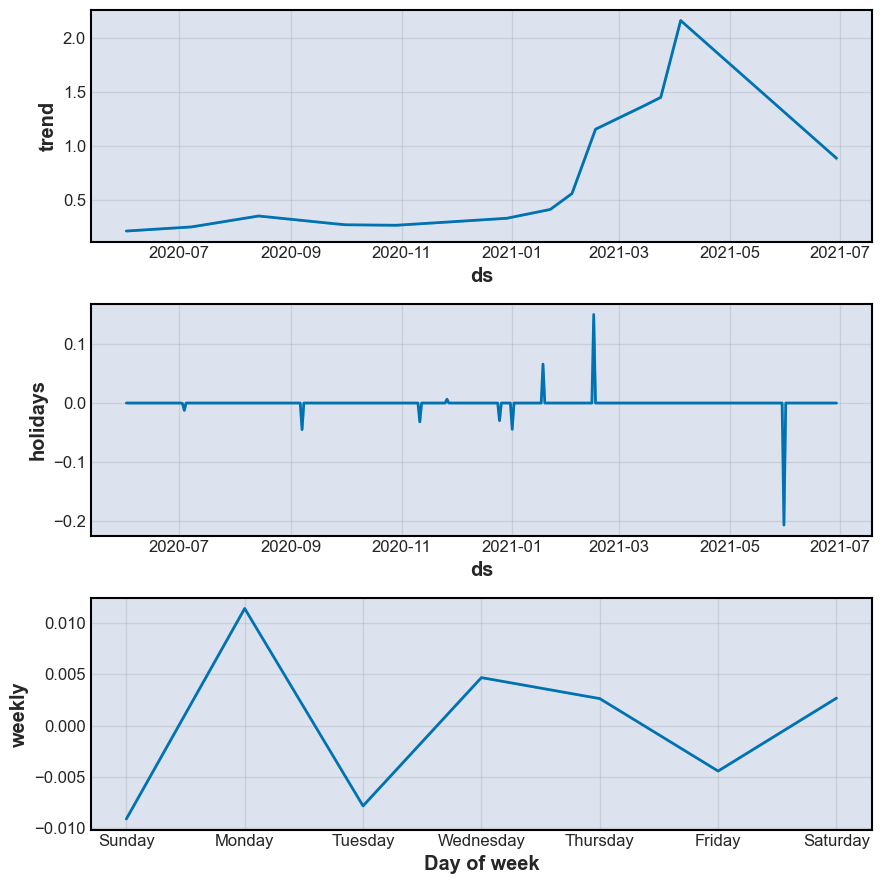

In [10]:
m = Prophet(changepoint_prior_scale=.7)
m.add_country_holidays(country_name='US')
m.fit(price_predict_df);
m.train_holiday_names

future = m.make_future_dataframe(periods=7)

forecast = m.predict(future)
fig = m.plot_components(forecast)

forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

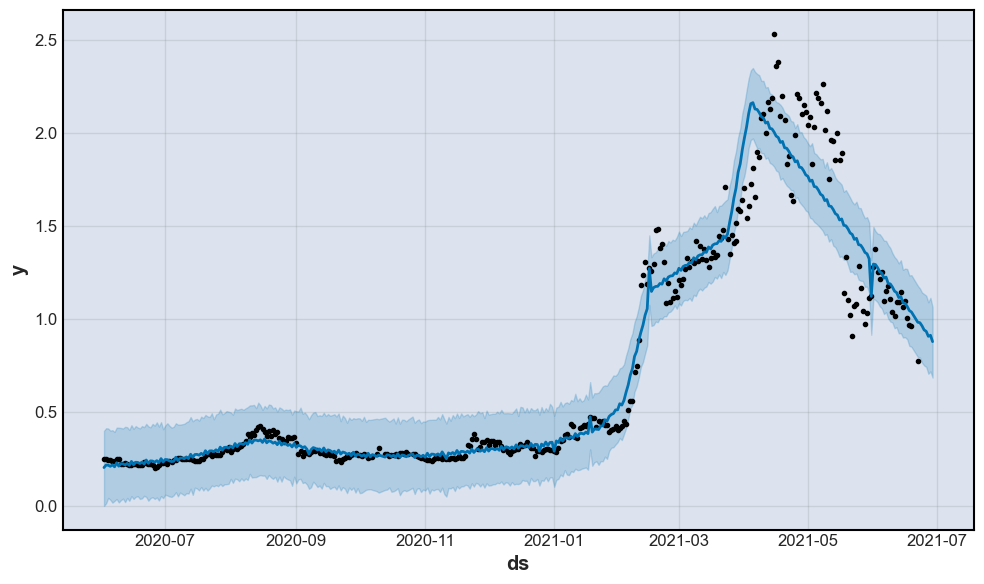

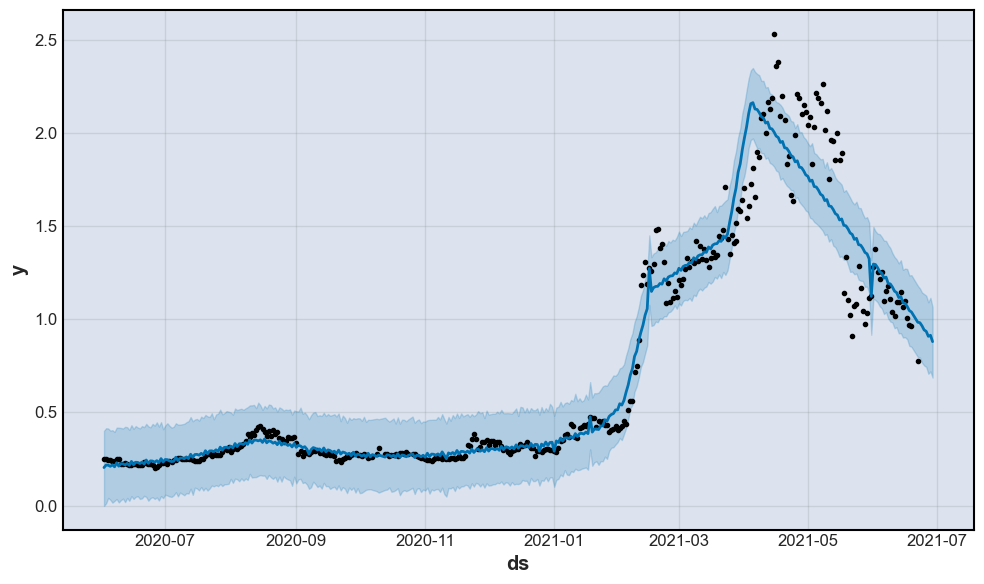

In [11]:
m.plot(forecast)

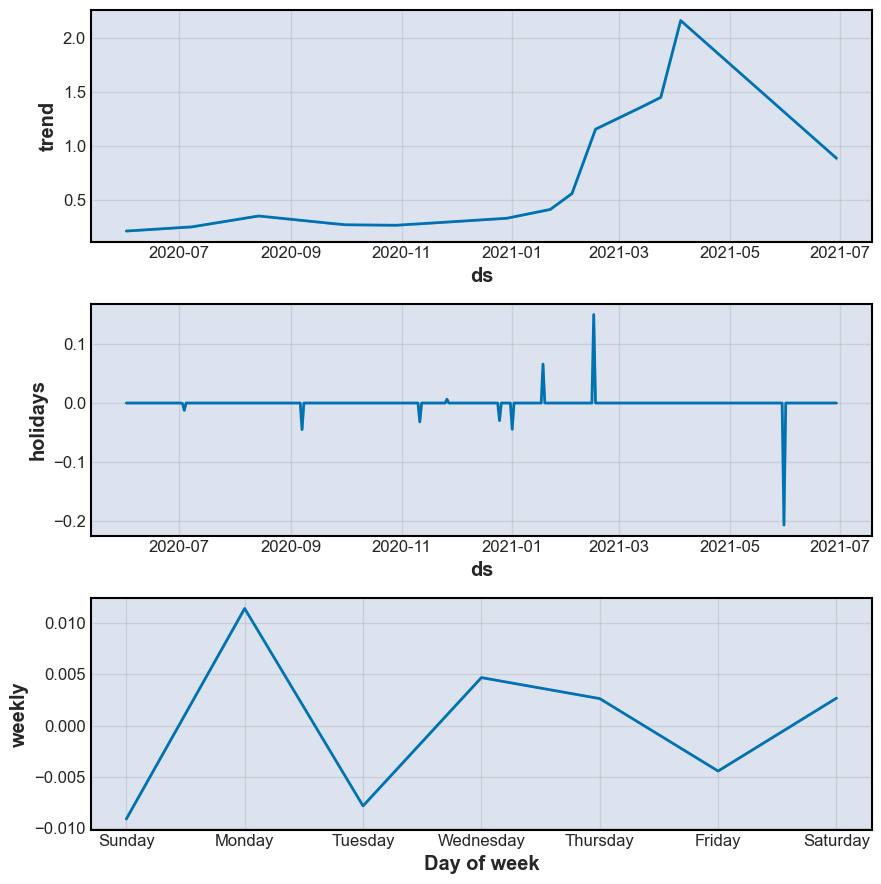

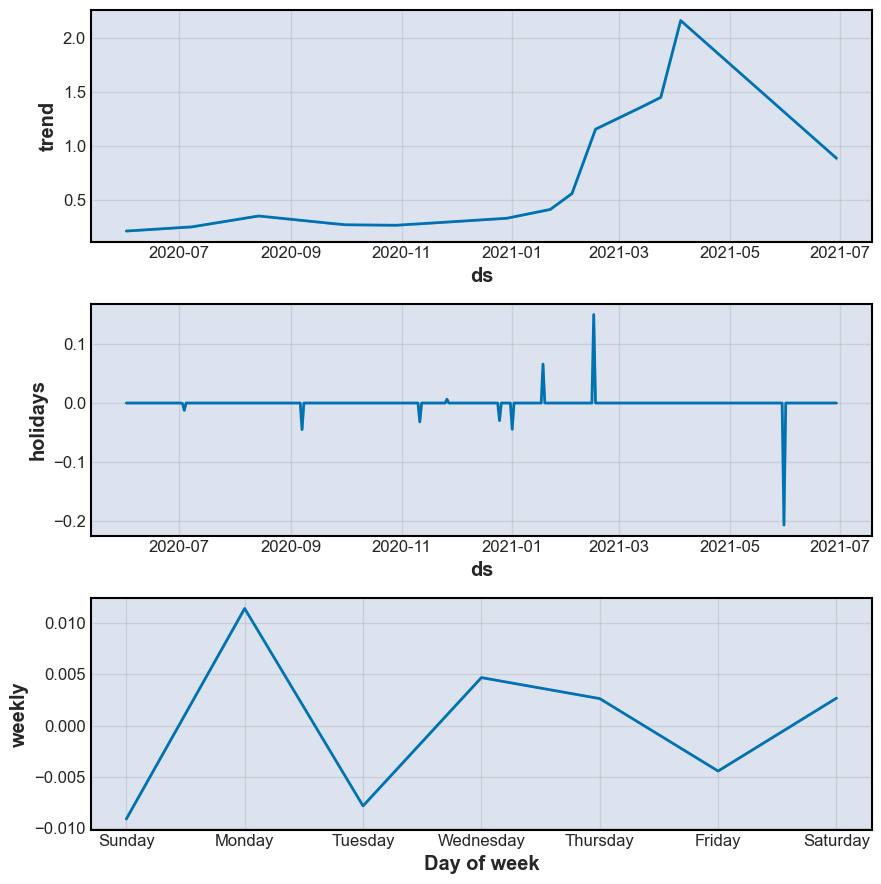

In [12]:
m.plot_components(forecast)